<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns
%matplotlib inline 
print("import complete")

import complete


Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
print('read')

read


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
missing_data = df.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Respondent
False    11398
Name: Respondent, dtype: int64

MainBranch
False    11398
Name: MainBranch, dtype: int64

Hobbyist
False    11398
Name: Hobbyist, dtype: int64

OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64

OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64

Employment
False    11398
Name: Employment, dtype: int64

Country
False    11398
Name: Country, dtype: int64

Student
False    11347
True        51
Name: Student, dtype: int64

EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64

UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64

EduOther
False    11234
True       164
Name: EduOther, dtype: int64

OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64

DevType
False    11333
True        65
Name: DevType, dtype: int64

YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64

Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64

YearsCodePro
False    113

In [4]:
df['ConvertedComp'].isna().sum()

816

In [5]:
df2 = df['ConvertedComp']
df2.head()
df2.isna().sum()

816

In [6]:
df2.dropna(axis=0, how='any', inplace=True)
df2.isna().sum()

0

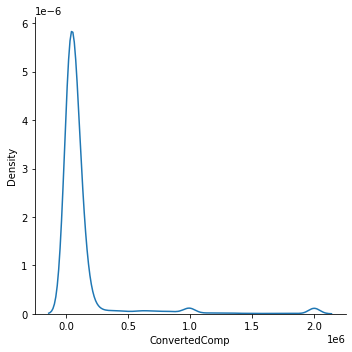

In [7]:
sns.displot(data = df2, label='yearly salary',kind = 'kde')

Plot the histogram for the column `ConvertedComp`.


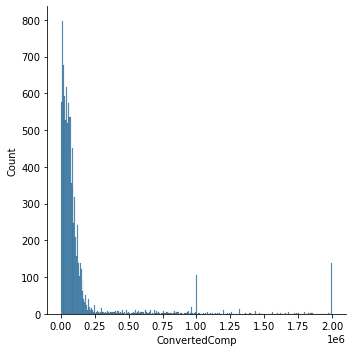

In [8]:
# your code goes here
sns.displot(df2,kde=False)

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df2.median()

57745.0

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
pd.set_option('display.max_columns', None)
df.head()

In [ ]:
df['Gender'].value_counts()

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
df.groupby('Gender', as_index=False).ConvertedComp.median()

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
df['Age'].describe()

Plot a histogram of the column `Age`.


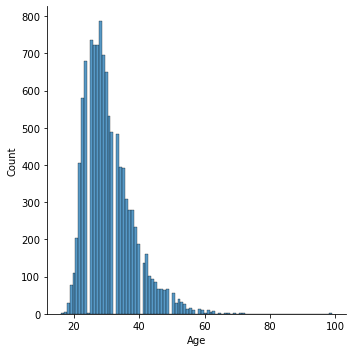

In [20]:
# your code goes here
sns.displot(df['Age'],kde=False)

<AxesSubplot:ylabel='Age'>

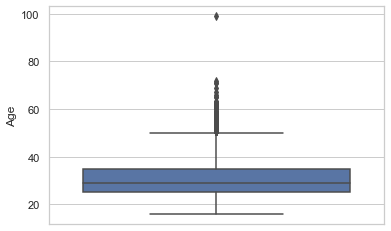

In [22]:
sns.set_theme(style="whitegrid")
sns.boxplot(y=df['Age'])

In [21]:
age = df['Age']
age.dropna(axis=0, how='any', inplace=True)
age.median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [ ]:
# your code goes here
sns.set_theme(style="whitegrid")
sns.boxplot(y=df2)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
import numpy as np

q1 = np.percentile(df2,25,interpolation = 'midpoint')
q3 = np.percentile(df2,75,interpolation = 'midpoint')
iqr = q3-q1
print(iqr)
print(q3,q1)

73132.0
100000.0 26868.0


In [24]:
threshold = iqr*1.5
print(q1-threshold,q3+threshold)
df2.shape

-82830.0 209698.0


(10582,)

Find out the upper and lower bounds.


In [25]:
# your code goes here
df2.describe().to_frame()


,ConvertedComp
count,10582.000000
mean,72327.661406
std,58619.926538
min,0.000000
25%,26868.000000
50%,57745.000000
75%,100000.000000
max,209698.000000


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
outlier_count=0
outliers = []
for x in df2:
    if (x > (q3+threshold)) or (x < (q1 - threshold)):
        outliers.append(x)
        outlier_count+=1
        
print(outlier_count)
        



879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
y=q3+threshold
x=q1-threshold
df2.clip(x,y,inplace=True)
df2.shape
df2.mean()

72327.66140616141

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
